In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [8]:
y_train[0]

5

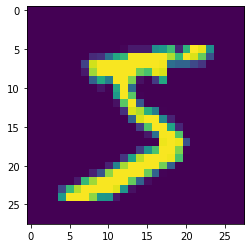

In [12]:
plt.imshow(x_train[0])
plt.show()

In [0]:
from tensorflow.keras.utils import to_categorical
y_train_categ= to_categorical(y_train)
y_test_categ= to_categorical(y_test)

In [0]:
x_train_reshaped= np.reshape(x_train,(60000,784))
x_test_reshaped= np.reshape(x_test,(10000,784))

In [16]:
x_train_reshaped

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
x_train_reshaped[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [19]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


**Normalization**

In [0]:
x_mean= np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon=1e-10


In [0]:
x_train_norm= (x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm= (x_test_reshaped-x_mean)/(x_std+epsilon)

(array([[60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 784 Lists of Patches objects>)

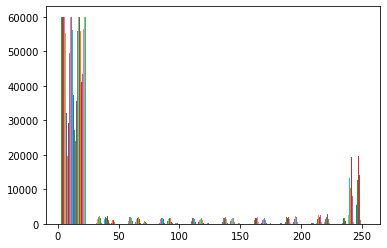

In [20]:
plt.hist(x_train_reshaped)

(array([[60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.],
        [60000.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([-0.42407389, -0.09951217,  0.22504955,  0.54961128,  0.874173  ,
         1.19873473,  1.52329645,  1.84785817,  2.1724199 ,  2.49698162,
         2.82154335]),
 <a list of 784 Lists of Patches objects>)

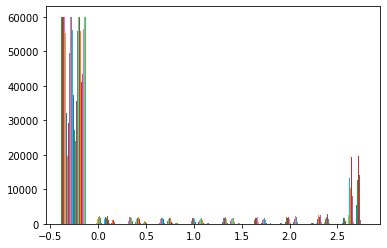

In [25]:
plt.hist(x_train_norm)

# ***Model implementation*** **bold text**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential([
                    Dense(128, activation='relu', input_shape=(784,)),
                    Dense(128, activation='relu'),
                    Dense(10,activation='softmax')
])

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train_norm,y_train_categ,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3635 - accuracy: 0.8946
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1812 - accuracy: 0.9467
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1378 - accuracy: 0.9592
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9677
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0941 - accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9798
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0618 - accuracy: 0.9823
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9847
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.049

In [32]:
_,accuracy = model.evaluate(x_test_norm,y_test_categ,)
print('test accuracy : ', accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9714
test accuracy :  97.14000225067139


In [0]:
preds=model.predict(x_test_norm)


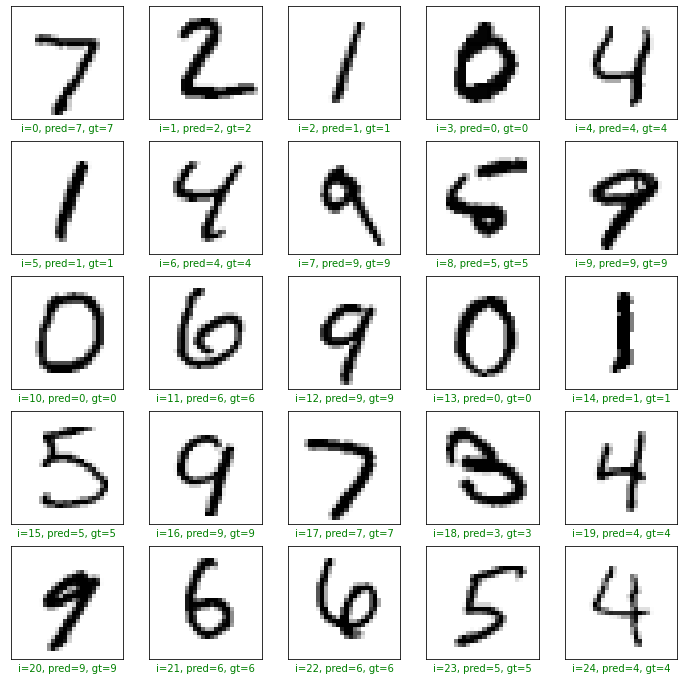

In [36]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  
  pred=np.argmax(preds[start_index+i])
  gt=y_test[start_index+i]

  col='g'
  if pred != gt:
    col='r'
  plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,pred,gt),color=col)
  plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

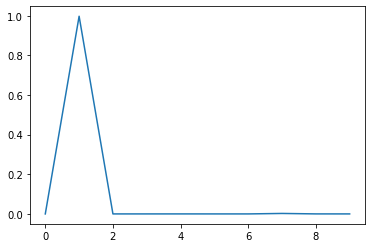

In [38]:
plt.plot(preds[5])
plt.show()